### Airline Data Analysis
We will use RNN to analyse the dataset, but first we will prepare the data for our model.

In [30]:
from pandas import read_csv
import numpy as np

In [31]:
df = read_csv('international-airline-passengers.csv', usecols=[1])

In [32]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [33]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [34]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0] - train_size
train_size, test_size

(96, 48)

In [35]:
train = values[0:train_size]
test = values[train_size:]

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [37]:
def create_dataset(data, k):
    # K is the window size
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        # Add i to i + k - 1 elements in X
        # And take i + k th element to be Y label of that
        x = data[i:i+k, 0]
        y = data[i+k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [38]:
look_back = 12 # We will consider prev 12 months to get the next month output
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [39]:
# Reshaping X data into 3D as RNN is our first layer and it requires a 3D input
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape, testX.shape

((84, 12, 1), (36, 12, 1))

In [40]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [41]:
model = Sequential()

RNN input shape is 3D:
1. No of training data pts.
2. Length of sequence.
3. No of features/time frame for each sequence

In [42]:
model.add(SimpleRNN(4, input_shape=(look_back, 1)))
model.add(Dense(1))
print(model.summary())
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
84/84 [==============================] - 1s 11ms/step - loss: 0.1997
Epoch 2/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0372
Epoch 3/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0238
Epoch 4/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 5/10
84/84 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 6/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 7/10
84/84 [==============================] - 0s 2ms/ste

In [47]:
testPredict = model.predict(testX)
# Unscale
testPredict = scaler.inverse_transform(testPredict).ravel()
testPredict

array([324.98483, 314.62384, 340.84354, 335.3423 , 316.37015, 362.21494,
       358.23242, 367.54837, 374.95358, 354.06528, 367.24323, 288.65454,
       337.50888, 319.42844, 352.16763, 361.47217, 334.43845, 386.1569 ,
       365.4965 , 386.57898, 369.78055, 369.86343, 381.4801 , 336.90625,
       367.97064, 343.61447, 373.4465 , 368.06528, 367.97266, 372.81177,
       395.54034, 385.80148, 371.33603, 373.55826, 390.44812, 350.8266 ],
      dtype=float32)

In [48]:
testPredict.shape

(36,)

In [49]:
trainPredict = model.predict(trainX)
# Unscale
trainPredict = scaler.inverse_transform(trainPredict).ravel()
trainPredict

array([153.24576, 137.0951 , 153.87747, 147.68842, 167.78181, 150.21143,
       156.425  , 174.16273, 209.83301, 175.01253, 138.39214, 138.49663,
       173.74681, 165.23193, 181.6498 , 180.152  , 185.13338, 209.4937 ,
       171.93872, 208.47227, 207.90962, 215.5241 , 162.6609 , 167.65636,
       184.18918, 193.1632 , 199.41808, 190.57504, 195.57973, 201.96632,
       214.32776, 228.65009, 260.77   , 207.62202, 205.99567, 172.38187,
       223.60501, 197.19319, 223.15768, 223.02966, 246.8678 , 256.5779 ,
       228.66898, 247.95625, 277.30142, 255.70334, 210.60263, 175.77512,
       225.42818, 214.49385, 214.6619 , 216.64247, 223.76147, 271.98068,
       239.26189, 281.34937, 285.73782, 280.98886, 212.87373, 212.75151,
       245.33751, 253.63959, 253.21841, 260.34564, 261.56525, 293.26547,
       293.12216, 316.28745, 325.2124 , 322.68198, 263.904  , 248.47383,
       282.74673, 279.39426, 305.878  , 296.44287, 297.6504 , 329.8244 ,
       333.27783, 340.45065, 356.83615, 341.6824 , 

In [50]:
trainPredict.shape

(84,)

In [51]:
testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testTrue.shape, trainTrue.shape

((36,), (84,))

In [53]:
# Plot
from matplotlib import pyplot as plt

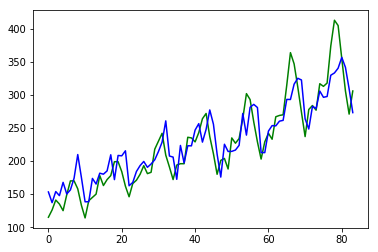

In [54]:
# Train true vs Train predictied
plt.plot(trainTrue, c = 'g')
plt.plot(trainPredict, c = 'b')
plt.show()

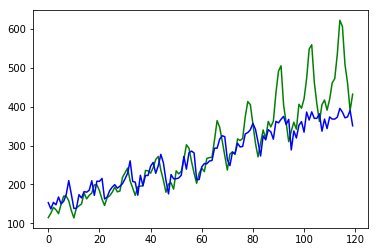

In [56]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()